In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
import scipy.stats as stats
import itertools
import seaborn as sns
import math

In [2]:
#Kendall rho coeff
def kendall(x,y1):
    y = y1
    num_conc = 0
    num_disc = 0
    T = 0
    U = 0
    
    for i in range (len(x)):
        for j in range(i,len(x)):
            if ((x[i] > x [j] and y[i] > y[j]) or (x[i] < x [j] and y[i] < y[j])):
                num_conc = num_conc + 1
            elif((x[i] > x [j] and y[i] < y[j]) or (x[i] < x [j] and y[i] > y[j])):
                num_disc = num_disc + 1
            elif(x[i] == x[j]):
                 T = T + 1
            elif(y[i] == y[j]):
                 U = U + 1
                    
    z = 0.5 * 100 * 99 
    
    tau_a = (num_conc - num_disc)/(z)
    tau_b = (num_conc - num_disc)/(math.sqrt(z-T) * math.sqrt(z-U))
    gamma = (num_conc - num_disc)/(num_conc + num_disc)
    
    return tau_a,tau_b,gamma

In [3]:
#lukasiewicz strict ordering factory
def strict_ordering(x, y,r):
    strict_ordering = min(1, max(0, 1 / r * (y - x)))
    return strict_ordering

def t_norm(x, y):
    return min(x, y)

vstrict_ordering = np.vectorize(strict_ordering, otypes=[np.float64])
vt_norm = np.vectorize(t_norm, otypes=[np.float64])

def permutation_pairs(x):
    
    n = x.shape[0]
    perm = np.empty((n, n, 2), dtype=x.dtype)
    perm[..., 0] = x[:, None]
    perm[..., 1] = x
    perm = perm.reshape(-1, 2)

    return np.delete(perm, np.arange(0, perm.shape[0], n + 1), axis=0)

def fuzzy_correlation(x, y,r):
        input_len = x.shape[0]
        index_permutations = permutation_pairs(np.arange(input_len))

        xi, xj = x[index_permutations].T
        yi, yj = y[index_permutations].T

        xixj = vstrict_ordering(xi, xj,r)
        yiyj = vstrict_ordering(yi, yj,r)
        yjyi = vstrict_ordering(yj, yi,r)

        concordant_pairs = vt_norm(xixj, yiyj)
        discordant_pairs = vt_norm(xixj, yjyi)

        c = np.sum(concordant_pairs)

        d = np.sum(discordant_pairs)

        return (c - d) / (c + d)

In [4]:
N = 100
STD = [0, 0.00097, 0.0019, 0.0039, 0.0078, 0.0156, 0.031, 0.062, 0.125]

def f(x):
    if 0 <= x < 0.2:
        return 0.4 + x/2
    
    elif 0.2 <= x <= 0.8:
        return 0.5
    
    else:
        return x/2 + 0.1

x = np.sort(np.random.random(N))

Text(0.5, 1.0, 'Function F')

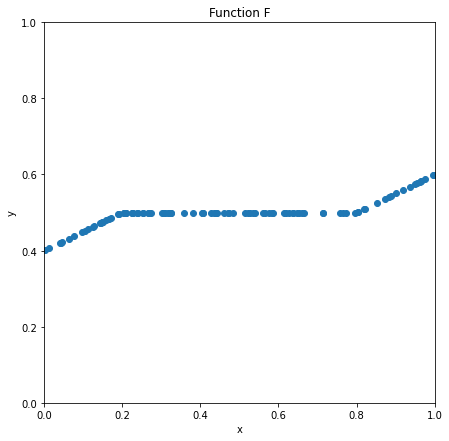

In [5]:
y = []
for i in range(100):
    y.append(f(x[i]))
    
y = np.array(y)

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(x,y)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Function F")

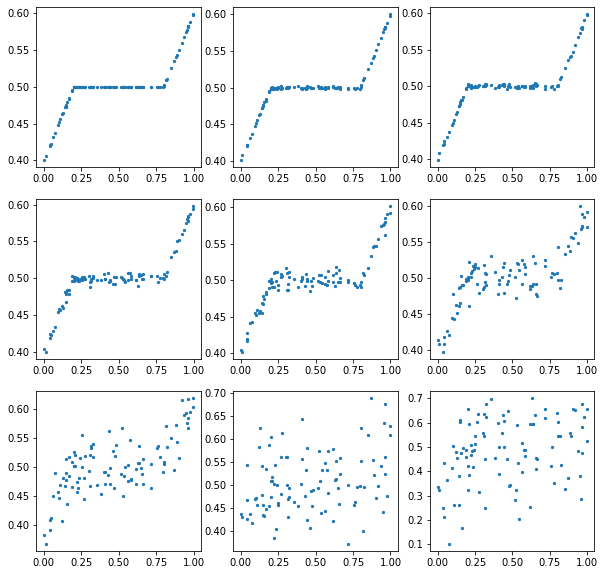

In [6]:
y_noise = []
y_n = []
rho = []
tau = []
gamma = []

fig, axs = plt.subplots(3,3,figsize=(10,10))
axs_ids = [[0,0],[0,1],[0,2],
            [1,0], [1,1], [1,2],
            [2, 0], [2,1], [2,2]]

for i in range(len(STD)):
    noise = np.random.normal(0,STD[i],N)
    y_n = y + noise
    
    axs_x, axs_y = axs_ids[i]
    axs[axs_x, axs_y].scatter(x, y_n, s=5)
    plt.show
    
    y_noise.append(y_n)


In [7]:
rho = []
tau_a = []
tau_b = []
gamma = []
fuzzy = []

for i in range(len(y_noise)):
    r, pval = stats.spearmanr(x, y_noise[i])
    rho.append(r)
    a,b,g = kendall(x,y_noise[i])
    tau_a.append(a)
    tau_b.append(b)
    gamma.append(g)
               
    f = fuzzy_correlation(x, y_noise[i],0.5)
    fuzzy.append(f)

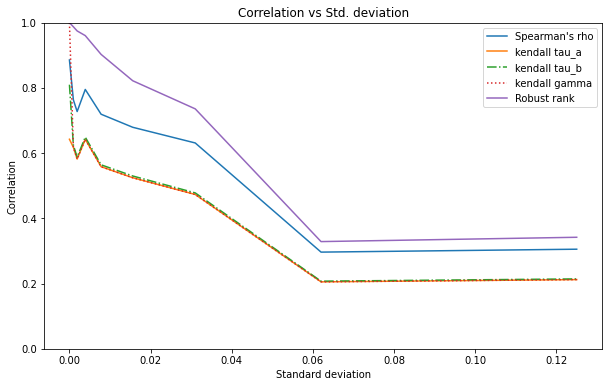

In [30]:
#graph of different correlation coeff w.r.t. standard deviation
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
plt.plot(STD,rho,label ="Spearman's rho")
plt.plot(STD,tau_a,linestyle="-",label = "kendall tau_a")
plt.plot(STD,tau_b, linestyle="-.",label = "kendall tau_b")
plt.plot(STD,gamma, linestyle=":",label = "kendall gamma")
plt.plot(STD,fuzzy,label = "Robust rank")
plt.legend()
plt.ylim(0,1)
plt.xlabel('Standard deviation')
plt.ylabel('Correlation')
plt.title("Correlation vs Std. deviation")
plt.show()

In [9]:
#r = 0.05
r1 = []

for i in range(len(y_noise)):
    f = fuzzy_correlation(x, y_noise[i],0.05)
    r1.append(f)

#r = 0.2
r2 = [] 
for i in range(len(y_noise)):
    f = fuzzy_correlation(x, y_noise[i],0.2)
    r2.append(f)

#r = 0.5
r3 = []
for i in range(len(y_noise)):
    f = fuzzy_correlation(x, y_noise[i],0.5)
    r3.append(f)


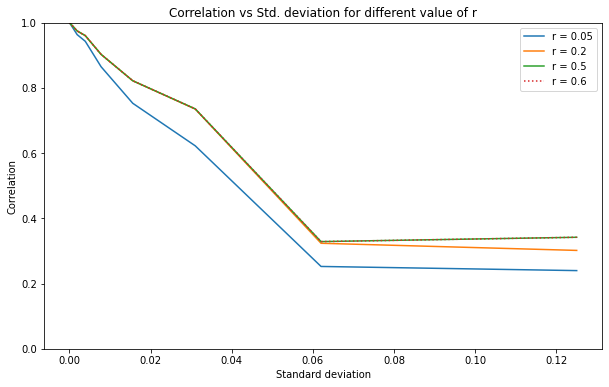

In [25]:
#graph of different value of r
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
plt.plot(STD,r1,label = "r = 0.05")
plt.plot(STD,r2,label = "r = 0.2")
plt.plot(STD,r3,label = "r = 0.5")
plt.plot(STD,fuzzy,linestyle=":",label = "r = 0.6")
plt.legend()
plt.ylim(0,1)
plt.xlabel('Standard deviation')
plt.ylabel('Correlation')
plt.title("Correlation vs Std. deviation for different value of r")
plt.show()

In [11]:
#Experiment 2
def h(x,q):
    if x < 0.5:
        x_0 = 0
        y_0 = q
        x_1 = 0.5
        y_1 = x_1/2 + 1/4
        y = y_0 + (x-x_0)*((y_1-y_0)/(x_1 - x_0))
        return y
    
    else:
        return x/2 + 1/4
    
y_2 = []
q = [0,0.2,0.4,0.6,0.8,1]
for l in range (len(q)):
    for i in range(100):
        y_2.append(h(x[i],q[l]))
    
y_2 = np.array(y_2)

Text(0.5, 1.0, 'q=1')

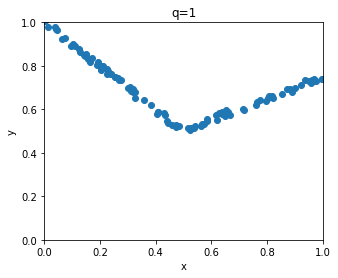

In [12]:
y_2 = np.reshape(y_2,(6,100))
y_2.shape
y_2_noise = []
y_2_n = np.zeros((6,100))
noise = np.random.normal(0,0.01,N)
noise = np.reshape(noise,(100,1))
for i in range(len(q)):
    for j in range (100):
        y_2_n[i,j] = y_2[i,j] + noise[j]

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)
plt.scatter(x,y_2_n[5])
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("q=1")

In [13]:
rho_2 = []
tau_a_2 = []
tau_b_2 = []
gamma_2 = []
fuzzy_2 = []

for i in range(len(y_2_n)):
    r, pval = stats.spearmanr(x, y_2_n[i])
    rho_2.append(r)
    a,b,g = kendall(x,y_2_n[i])
    tau_a_2.append(a)
    tau_b_2.append(b)
    gamma_2.append(g)
               
    f = fuzzy_correlation(x, y_2_n[i],0.5)
    fuzzy_2.append(f)

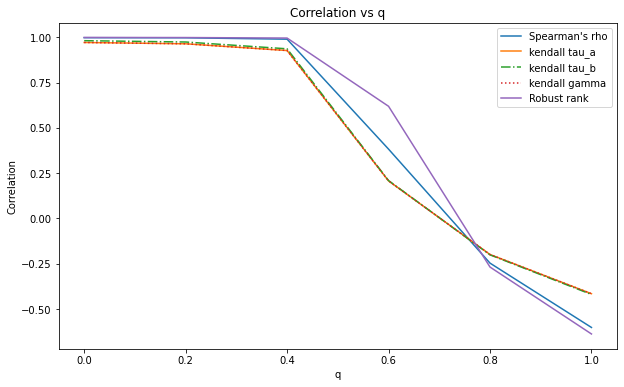

In [29]:
#graph of different correlation coeff w.r.t. q
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
plt.plot(q,rho_2,label ="Spearman's rho")
plt.plot(q,tau_a_2,linestyle="-",label = "kendall tau_a")
plt.plot(q,tau_b_2, linestyle="-.",label = "kendall tau_b")
plt.plot(q,gamma_2, linestyle=":",label = "kendall gamma")
plt.plot(q,fuzzy_2,label = "Robust rank")
plt.legend()
plt.xlabel('q')
plt.ylabel('Correlation')
plt.title("Correlation vs q")
plt.show()

In [15]:
#r = 0.05
r1_2 = []

for i in range(len(y_2_n)):
    f = fuzzy_correlation(x, y_2_n[i],0.05)
    r1_2.append(f)

#r = 0.2
r2_2 = [] 
for i in range(len(y_2_n)):
    f = fuzzy_correlation(x, y_2_n[i],0.2)
    r2_2.append(f)

#r = 0.5
r3_2 = []
for i in range(len(y_2_n)):
    f = fuzzy_correlation(x, y_2_n[i],0.5)
    r3_2.append(f)

#r = 0.7
r4_2 = []
for i in range(len(y_2_n)):
    f = fuzzy_correlation(x, y_2_n[i],0.7)
    r4_2.append(f)

#r = 0.9
r5_2 = []
for i in range(len(y_2_n)):
    f = fuzzy_correlation(x, y_2_n[i],0.9)
    r5_2.append(f)

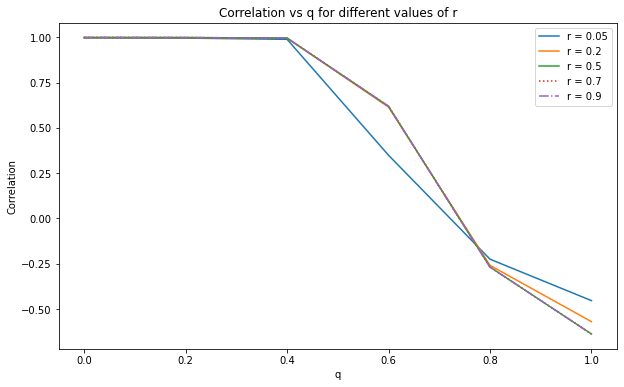

In [16]:
#graph of different value of r
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
plt.plot(q,r1_2,label = "r = 0.05")
plt.plot(q,r2_2,label = "r = 0.2")
plt.plot(q,r3_2,label = "r = 0.5")
plt.plot(q,r4_2,linestyle=":",label = "r = 0.7")
plt.plot(q,r5_2, linestyle="-.",label = "r = 0.9")
plt.legend()
plt.xlabel('q')
plt.ylabel('Correlation')
plt.title("Correlation vs q for different values of r")
plt.show()